<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis
---

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

<a id="pandas"></a>

## 1. What Is Pandas?

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:

* Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
* Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
* The total size of an `ndarray` is fixed.

Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### 1.1 Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. 

In standard Python, this would most likely give a syntax error.  

Pandas also highly favors certain patterns of use. 

For example, looping through a `DataFrame` row by row is highly discouraged. 

Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### 1.2 Class Methods and Attributes

The Pandas `DataFrame` is a Pandas class object, and therefore comes with a set of attributes (or properties) and methods that can be applied specifically to Pandas ``DataFrames``. 

To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable

- users.head()      # calls the `head` method (since there are open/closed parentheses)

- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:

- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

Let's try it out by reading in a CSV file and accessing some of its attributes (downloaded from here (Table 32): https://data.gov.uk/dataset/44864962-e4ad-46e6-8f10-71b40126cefb/higher-education-student-data):

We start by importing ``pandas`` and reading in a CSV file using the ``read_csv`` function. We've also imported ``matplotlib`` for plotting, which we'll do later.

We preview the first five rows of the ``DataFrame`` using the ``head`` method.

The ``header`` parameter specifies that the column names are in row ``16`` of the underlying CSV file. 

Notice that ``pandas`` picks out the column names, and numbers the rows.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

university_df = pd.read_csv('./data/Higher_Ed_by_Ethnicity.csv',header=16)
university_df.head(5)

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


Using the ``index`` attribute shows us how many rows are in the dataframe

In [2]:
# 104,195 rows 
university_df.index

RangeIndex(start=0, stop=104195, step=1)

We can also quickly access the column names (which need cleaning!)

In [3]:
university_df.columns

Index(['Subject of study marker', 'Subject of study', 'Level of qualification',
       'Mode of study', 'Academic Year', 'Ethnicity marker', 'Number'],
      dtype='object')

But the ``shape`` attribute is a better way of figuring out how big our dataset is.

In [4]:
# 104,195 rows; 7 columns
university_df.shape

(104195, 7)

We can confirm that our ``DataFrame`` is the correct datatype

In [5]:
type(university_df)     

pandas.core.frame.DataFrame

We can check the datatypes of individual columns

In [6]:
university_df.dtypes

Subject of study marker    object
Subject of study           object
Level of qualification     object
Mode of study              object
Academic Year              object
Ethnicity marker           object
Number                      int64
dtype: object

If needed, we could convert non-numeric types to numeric types using the ``to_numeric`` function. Note that the ``str.replace()`` function can been used to remove any punctuation in the column before it can be converted into a numeric type.

In [11]:
#university_df['Academic Year'] = pd.to_numeric(university_df['Academic Year'])

We can access all the values in the ``DataFrame`` as a Numpy array, which is less readable.

In [7]:
university_df.values

array([['Subject area', '(1) Medicine & dentistry', 'All', ...,
        '2017/18', 'White', 7355],
       ['Subject area', '(1) Medicine & dentistry', 'All', ...,
        '2017/18', 'Black', 425],
       ['Subject area', '(1) Medicine & dentistry', 'All', ...,
        '2017/18', 'Asian', 2705],
       ...,
       ['Subject area', 'Total', 'All undergraduate', ..., '2014/15',
        'Other', 680],
       ['Subject area', 'Total', 'All undergraduate', ..., '2014/15',
        'Not known', 4300],
       ['Subject area', 'Total', 'All undergraduate', ..., '2014/15',
        'Total', 70705]], dtype=object)

## 1.3 Selecting and indexing data

Pandas DataFrames have structural similarities with Python-style lists and dictionaries.  

In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [8]:
university_df['Academic Year']

0         2017/18
1         2017/18
2         2017/18
3         2017/18
4         2017/18
           ...   
104190    2014/15
104191    2014/15
104192    2014/15
104193    2014/15
104194    2014/15
Name: Academic Year, Length: 104195, dtype: object

The result is a Pandas series.

In [9]:
type(university_df['Academic Year'])

pandas.core.series.Series

We can also select a single column using double brackets syntax

In [10]:
university_df[['Academic Year']]

,Academic Year
0,2017/18
1,2017/18
2,2017/18
3,2017/18
4,2017/18
...,...
104190,2014/15
104191,2014/15
104192,2014/15
104193,2014/15


The result is a DataFrame

In [11]:
type(university_df[['Academic Year']])

pandas.core.frame.DataFrame

We can select multiple columns using ``loc`` attribute.

In [13]:
# "loc" locates the values from first parameter (: means "all rows") and second parameter (column is "Academic Year")
university_df.loc[:, 'Academic Year']

0         2017/18
1         2017/18
2         2017/18
3         2017/18
4         2017/18
           ...   
104190    2014/15
104191    2014/15
104192    2014/15
104193    2014/15
104194    2014/15
Name: Academic Year, Length: 104195, dtype: object

In [14]:
# Select two columns by containing column names in list format
university_df.loc[:, ['Academic Year', 'Subject of study']]

,Academic Year,Subject of study
0,2017/18,(1) Medicine & dentistry
1,2017/18,(1) Medicine & dentistry
2,2017/18,(1) Medicine & dentistry
3,2017/18,(1) Medicine & dentistry
4,2017/18,(1) Medicine & dentistry
...,...,...
104190,2014/15,Total
104191,2014/15,Total
104192,2014/15,Total
104193,2014/15,Total


In [15]:
# Select range of columns (from Academic Year to Number) — Pandas index ranges INCLUDE the final column in the range
university_df.loc[:, 'Academic Year' : 'Number']

,Academic Year,Ethnicity marker,Number
0,2017/18,White,7355
1,2017/18,Black,425
2,2017/18,Asian,2705
3,2017/18,Mixed,495
4,2017/18,Other,305
...,...,...,...
104190,2014/15,Asian,4845
104191,2014/15,Mixed,1470
104192,2014/15,Other,680
104193,2014/15,Not known,4300


In [16]:
# Filter rows by their index (1st row, all columns)
university_df.loc[0, :]

Subject of study marker                Subject area
Subject of study           (1) Medicine & dentistry
Level of qualification                          All
Mode of study                             Full-time
Academic Year                               2017/18
Ethnicity marker                              White
Number                                         7355
Name: 0, dtype: object

In [17]:
# Rows 0-2, all columns
university_df.loc[0:2, :]

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705


In [18]:
# Rows 0-2, range of columns
university_df.loc[0:2, 'Academic Year' : 'Number'] 

,Academic Year,Ethnicity marker,Number
0,2017/18,White,7355
1,2017/18,Black,425
2,2017/18,Asian,2705


The `iloc` attribute filters rows and columns by index position only, although it has some quirks when using integer range instead of Pandas index range.

In [19]:
# All rows, columns in position 0 and 3 
university_df.iloc[:, [0, 3]]

,Subject of study marker,Mode of study
0,Subject area,Full-time
1,Subject area,Full-time
2,Subject area,Full-time
3,Subject area,Full-time
4,Subject area,Full-time
...,...,...
104190,Subject area,Part-time
104191,Subject area,Part-time
104192,Subject area,Part-time
104193,Subject area,Part-time


In [20]:
# All rows, columns in position 0-3
# Note that it is NOT INCLUDING 4 (5th column) because this is an integer range, not a Pandas index range!
university_df.iloc[:, 0:4]

,Subject of study marker,Subject of study,Level of qualification,Mode of study
0,Subject area,(1) Medicine & dentistry,All,Full-time
1,Subject area,(1) Medicine & dentistry,All,Full-time
2,Subject area,(1) Medicine & dentistry,All,Full-time
3,Subject area,(1) Medicine & dentistry,All,Full-time
4,Subject area,(1) Medicine & dentistry,All,Full-time
...,...,...,...,...
104190,Subject area,Total,All undergraduate,Part-time
104191,Subject area,Total,All undergraduate,Part-time
104192,Subject area,Total,All undergraduate,Part-time
104193,Subject area,Total,All undergraduate,Part-time


In [21]:
# Rows 0-2, all columns
university_df.iloc[0:3, :] 

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705


We can select multiple columns using the indexing operator, but that can be an overload depending on size of DataFrame, hence why using `loc` and `iloc` is best practice.

In [12]:
my_cols = ['Academic Year', 'Subject of study']     # Create a list of column names...

university_df[my_cols]                    # ...and use that list to create subset of DataFrame

,Academic Year,Subject of study
0,2017/18,(1) Medicine & dentistry
1,2017/18,(1) Medicine & dentistry
2,2017/18,(1) Medicine & dentistry
3,2017/18,(1) Medicine & dentistry
4,2017/18,(1) Medicine & dentistry
...,...,...
104190,2014/15,Total
104191,2014/15,Total
104192,2014/15,Total
104193,2014/15,Total


In [22]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
university_df[['Academic Year', 'Subject of study'] ]

,Academic Year,Subject of study
0,2017/18,(1) Medicine & dentistry
1,2017/18,(1) Medicine & dentistry
2,2017/18,(1) Medicine & dentistry
3,2017/18,(1) Medicine & dentistry
4,2017/18,(1) Medicine & dentistry
...,...,...
104190,2014/15,Total
104191,2014/15,Total
104192,2014/15,Total
104193,2014/15,Total


## 1.3 Summarising the data

Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding. The ``describe`` method gives summary statistics for all the numeric columns in the data.

In [23]:
university_df.describe() 

,Number
count,104195.000000
mean,1529.443399
std,14211.632245
min,0.000000
25%,0.000000
50%,15.000000
75%,150.000000
max,569185.000000


It's also possible to get summary statistics for all columns including the non-numeric ones by brute force.

In [24]:
university_df.describe(include='all')

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
count,104195,104195,104195,104195,104195,104195,104195.000000
unique,2,188,7,3,4,7,NaN
top,Principal subject,Total,All,All,2015/16,White,NaN
freq,91315,1176,15680,35735,26117,14885,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1529.443399
std,NaN,NaN,NaN,NaN,NaN,NaN,14211.632245
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,15.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,150.000000


And to get summaries for individual columns.

In [25]:
university_df['Academic Year'].describe()

count      104195
unique          4
top       2015/16
freq        26117
Name: Academic Year, dtype: object

The ``value_counts`` method gives a count for each unique value in a DataFrame column.

In [26]:
university_df['Subject of study'].value_counts()

Total                                                                       1176
(M2) Law by topic                                                            588
(L4) Social policy                                                           588
(L5) Social work                                                             588
(L6) Anthropology                                                            588
                                                                            ... 
(D7) Agricultural sciences                                                   301
(K0) Broadly-based programmes within architecture, building & planning       294
(T8) Australasian studies                                                    287
(P0) Broadly-based programmes within mass communications & documentation     189
(A0) Broadly-based programmes within medicine & dentistry                     42
Name: Subject of study, Length: 188, dtype: int64

And the ``hist`` method gives a visual representation of value counts

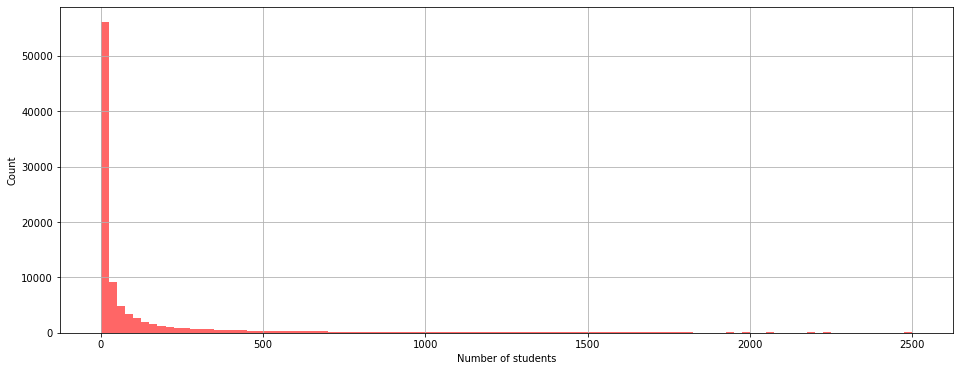

In [27]:
university_df['Number'].hist(bins=100, range=[0, 2500], figsize=(16,6), color='red', alpha=0.6);
plt.xlabel('Number of students')
plt.ylabel('Count');


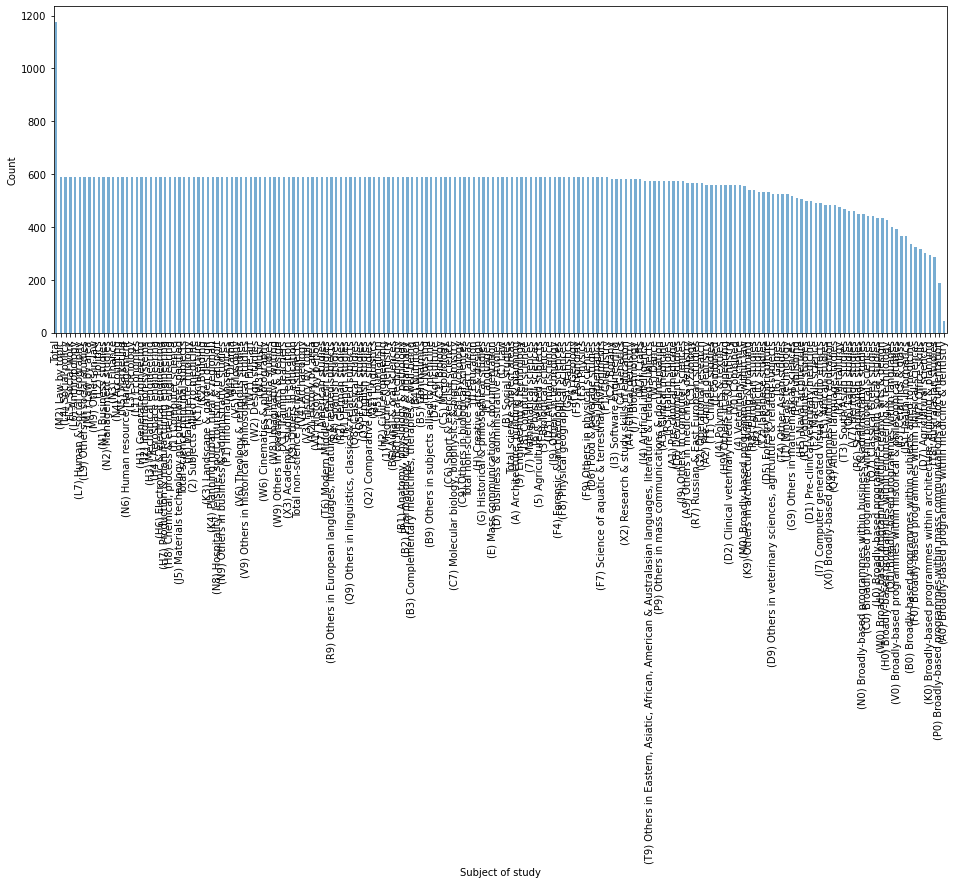

In [36]:
university_df['Subject of study'].value_counts().plot(kind='bar', figsize=(16,6), alpha=0.6)
plt.xlabel('Subject of study')
plt.ylabel('Count');


<a id="filtering-and-sorting"></a>
## Filtering and Sorting Data

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

In [37]:
university_df.head()

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


In [38]:
# Create a Series of Booleans…this comparison is performed element-wise on each row of data

number_filter = university_df['Number'] > 3000
number_filter.head()

0     True
1    False
2    False
3    False
4    False
Name: Number, dtype: bool

In [39]:
# Use Boolean Series to filter rows - indexing DataFrame by Boolean Series only selects rows that are True

university_df[number_filter].head()

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
6,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Total,11700
13,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Total,3175
14,Subject area,(1) Medicine & dentistry,All,All,2017/18,White,9130
16,Subject area,(1) Medicine & dentistry,All,All,2017/18,Asian,3250


We can also filter on strings

In [40]:
med_filter = university_df['Subject of study'] == '(1) Medicine & dentistry'
medicine_df = university_df[med_filter]
medicine_df.head()

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


We can also use the ``str.contains()`` method to find all rows that contain a particular string. Notice that we use the ``str.lower()`` method first, to convert the column we're searching to lowercase.

In [41]:
science_filter = university_df['Subject of study'].str.lower().str.contains('science')
science_df = university_df[science_filter]
science_df.head()

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
1176,Subject area,(3) Biological sciences,All,Full-time,2017/18,White,41175
1177,Subject area,(3) Biological sciences,All,Full-time,2017/18,Black,2725
1178,Subject area,(3) Biological sciences,All,Full-time,2017/18,Asian,4695
1179,Subject area,(3) Biological sciences,All,Full-time,2017/18,Mixed,2135
1180,Subject area,(3) Biological sciences,All,Full-time,2017/18,Other,580


In [ ]:
# You can combine this into a single step:

#science_df = university_df[university_df['Subject of study'].str.lower().str.contains('science')]

We can combine multiple logical tests into a single filter

In [43]:
pt_med_filter = (university_df['Subject of study'] == '(1) Medicine & dentistry') & (university_df['Mode of study'] == 'Part-time')
part_time_medicine_df = university_df[pt_med_filter]
part_time_medicine_df.head()

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
7,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,White,1770
8,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Black,100
9,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Asian,545
10,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Mixed,90
11,Subject area,(1) Medicine & dentistry,All,Part-time,2017/18,Other,75


This is a more efficient alternative to using lots of 'AND' and 'OR' statements.

In [44]:
university_df[university_df['Subject of study'].isin(['(1) Medicine & dentistry', '(H1) General engineering'])]

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305
...,...,...,...,...,...,...,...
39482,Principal subject,(H1) General engineering,All undergraduate,All,2014/15,Asian,205
39483,Principal subject,(H1) General engineering,All undergraduate,All,2014/15,Mixed,50
39484,Principal subject,(H1) General engineering,All undergraduate,All,2014/15,Other,25
39485,Principal subject,(H1) General engineering,All undergraduate,All,2014/15,Not known,115


## Setting values in Dataframes

You can select row index and column name using Pandas `at` attribute - similar to `loc` attribute.

In [45]:
# Select 3rd row of 'Subject of study'
university_df.at[2, 'Subject of study'] = 'Test value'
university_df.head()


,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
0,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,White,7355
1,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Black,425
2,Subject area,Test value,All,Full-time,2017/18,Asian,2705
3,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Mixed,495
4,Subject area,(1) Medicine & dentistry,All,Full-time,2017/18,Other,305


## Sorting values

It's possible to sort the rows in a DataFrame by one column in ascending or descending order.

In [46]:
university_df.sort_values(by='Number', ascending=True)

,Subject of study marker,Subject of study,Level of qualification,Mode of study,Academic Year,Ethnicity marker,Number
19030,Principal subject,(B6) Aural & oral sciences,All undergraduate,All,2015/16,Other,0
101958,Principal subject,(Y0) Combined,Postgraduate (research),Full-time,2017/18,Mixed,0
101959,Principal subject,(Y0) Combined,Postgraduate (research),Full-time,2017/18,Other,0
101960,Principal subject,(Y0) Combined,Postgraduate (research),Full-time,2017/18,Not known,0
58972,Principal subject,(L4) Social policy,First degree,Part-time,2016/17,Other,0
...,...,...,...,...,...,...,...
103151,Principal subject,Total,All,All,2014/15,Total,544680
103067,Principal subject,Total,All,All,2016/17,Total,555475
103088,Subject area,Total,All,All,2016/17,Total,555475
103025,Principal subject,Total,All,All,2017/18,Total,569185


## Renaming, Adding, and Removing Columns

In [47]:
# Print the column labels
print(university_df.columns)

Index(['Subject of study marker', 'Subject of study', 'Level of qualification',
       'Mode of study', 'Academic Year', 'Ethnicity marker', 'Number'],
      dtype='object')


In [48]:
# Re-name one or more columns in a single output using key-value mapping
# You must add inplace=True to be able to access the column names after

university_df.rename(columns={'Subject of study marker': 'study_marker', 
                              'Subject of study':'subject', 
                              'Level of qualification': 'qualification', 
                              'Mode of study': 'study_mode', 
                              'Academic Year':'academic_year', 
                              'Ethnicity marker': 'ethnicity', 
                              'Number': 'number'}, 
                     inplace=True)

In [49]:
university_df.columns

Index(['study_marker', 'subject', 'qualification', 'study_mode',
       'academic_year', 'ethnicity', 'number'],
      dtype='object')

You can change the column names via `columns` attribute:

In [50]:
new_col_names = ['subject_marker', 'subject', 'qualification', 'study_mode','academic_year', 'ethnicity', 'number']

university_df.columns = new_col_names

## Easy Column Operations

Rather than having to reference indexes and create For loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [51]:
# Add new column as a function of existing column
university_df['number_thousands'] = university_df['number']/1000

# Lowercase all values in existing column
university_df['subject'] = university_df['subject'].str.lower()

university_df.head()

,study_marker,subject,qualification,study_mode,academic_year,ethnicity,number,number_thousands
0,Subject area,(1) medicine & dentistry,All,Full-time,2017/18,White,7355,7.355
1,Subject area,(1) medicine & dentistry,All,Full-time,2017/18,Black,425,0.425
2,Subject area,test value,All,Full-time,2017/18,Asian,2705,2.705
3,Subject area,(1) medicine & dentistry,All,Full-time,2017/18,Mixed,495,0.495
4,Subject area,(1) medicine & dentistry,All,Full-time,2017/18,Other,305,0.305


## Removing Columns

In [52]:
university_df.drop(columns=['study_marker'], inplace=True)
university_df.head()

,subject,qualification,study_mode,academic_year,ethnicity,number,number_thousands
0,(1) medicine & dentistry,All,Full-time,2017/18,White,7355,7.355
1,(1) medicine & dentistry,All,Full-time,2017/18,Black,425,0.425
2,test value,All,Full-time,2017/18,Asian,2705,2.705
3,(1) medicine & dentistry,All,Full-time,2017/18,Mixed,495,0.495
4,(1) medicine & dentistry,All,Full-time,2017/18,Other,305,0.305


## Handling Missing Values

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

**For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

Let's read in another dataset ('Expenses Jan to Mar 19' data downloaded from here: https://data.gov.uk/dataset/091af8ee-95db-4336-9902-42ee998be323/senior-officials-expenses-travel-and-hospitality-in-dwp) to understand missing values.

You'll notice that a lot of cells contain ``NaN`` or 'not a number'.

In [53]:
dwp_expenses = pd.read_csv('./data/dwp-senior-officials-expenses-jan-mar-2019.csv', encoding='latin1')

dwp_expenses.head()

,"Name (Firstname, Surname)",Start date of trip (DD/MM/YYYY),Duration of Visit (Days),Destination,Purpose of trip,Mode of transport,Class of travel,Accomodation/Meals,Other (including hospitality given),"Total cost, including all visas, accommodation, travel, meals etc. (£)",Total Cost of Use of Official Secure Car
0,Peter Schofield,11/01/2019,1.0,Swindon,Site Events,Rail,Standard,NaN,NaN,£50.35,NaN
1,Peter Schofield,18/01/2019,1.0,Estree/Borehamwood/ Watford,Site Events,Rail,Standard,NaN,NaN,£16.30,NaN
2,Peter Schofield,24/01/2019,1.0,Stockport/Manchester,Site Events,Rail,Standard,NaN,NaN,£283.30,NaN
3,Peter Schofield,30/01/2019,1.0,Birmingham/Sheffield,Site Events,Rail,Standard,NaN,NaN,£190.90,NaN
4,Peter Schofield,20/03/2019,1.0,Blackpool,Site Events,Rail / Taxi,Standard,NaN,NaN,£186.10,NaN


In [54]:
dwp_expenses.isnull().sum()

Name (Firstname, Surname)                                                   0
Start date of trip (DD/MM/YYYY)                                             2
Duration of Visit (Days)                                                    4
Destination                                                                 6
Purpose of trip                                                             3
Mode of transport                                                          22
Class of travel                                                            35
Accomodation/Meals                                                        209
Other (including hospitality given)                                       412
Total cost, including all visas, accommodation, travel, meals etc. (£)      4
Total Cost of Use of Official Secure Car                                  455
dtype: int64

If we check the type of one of these ``NaN`` elements, we'll see it's still 'float'.

In [56]:
# 1st row of 'Accomodation/Meals'
dwp_expenses.iloc[0, 7]

nan

In [57]:
type(dwp_expenses.iloc[0, 7])

float

In [58]:
# Only show rows where the Accommodation/Meals column is not NaN (see £ symbol which should be removed)
dwp_expenses[dwp_expenses['Accomodation/Meals'].notnull()].head()

,"Name (Firstname, Surname)",Start date of trip (DD/MM/YYYY),Duration of Visit (Days),Destination,Purpose of trip,Mode of transport,Class of travel,Accomodation/Meals,Other (including hospitality given),"Total cost, including all visas, accommodation, travel, meals etc. (£)",Total Cost of Use of Official Secure Car
11,Neil Couling,07/03/2019,1.0,Manchester,Meetings in Manchester Hub,Rail,Standard,£84.59,NaN,£91.60,NaN
12,Neil Couling,08/03/2019,1.0,Hartlepool,Visit Hartlepool JCP & BSC,Rail,Standard,£2.20,NaN,£219.10,NaN
13,Neil Couling,14/03/2019,2.0,Leeds,Visit teams in Leeds,Rail,Standard,£83.05,NaN,£354.05,NaN
19,Janice Hartley,26/02/2019,2.0,Leeds,"Fraud, Error and Debt Board, Universal Credit ...",Car,Standard,£99.00,NaN,£148.10,NaN
21,Janice Hartley,14/03/2019,2.0,Leeds,"Future Leaders Scheme review, team meeting",Car,Standard,£77.00,NaN,£144.10,NaN


In [59]:
# Missing values are usually excluded in calculations by default
dwp_expenses['Purpose of trip'].value_counts()

Meetings with Staff                               34
Meetings with colleagues and team                 14
DfE-DWP Joint Locations meeting                    9
Meetings with staff                                9
Training                                           9
                                                  ..
Meeting Digital staff in Sheffield                 1
Meetings in PP with Digital Teams                  1
Traveling with colleague                           1
Visit to Newcastle                                 1
Investiture & Meeting with Permanent Secretary     1
Name: Purpose of trip, Length: 277, dtype: int64

In [61]:
# Added parameter includes missing values (209 NaN values)
dwp_expenses['Accomodation/Meals'].value_counts(dropna=False)

NaN         209
£5.00        41
s            11
£90.60        7
£10.00        7
           ... 
£76.95        1
£100.80       1
£98.00        1
£80.05        1
£606.40       1
Name: Accomodation/Meals, Length: 167, dtype: int64

We can choose to drop rows containing ``NaN`` values, or fill in ``NaN`` values with a string, float or other element of our choice. 

Be careful when doing either of these things; you could end up unintentionally removing rows, or filling in values that don't make sense or aren't accurate.

In this case, it would be important to clarify whether a ``NaN`` value in a particular column means the amount is zero, or whether it means the amount is unknown.

In [62]:
dwp_expenses.dtypes

Name (Firstname, Surname)                                                  object
Start date of trip (DD/MM/YYYY)                                            object
Duration of Visit (Days)                                                  float64
Destination                                                                object
Purpose of trip                                                            object
Mode of transport                                                          object
Class of travel                                                            object
Accomodation/Meals                                                         object
Other (including hospitality given)                                        object
Total cost, including all visas, accommodation, travel, meals etc. (£)     object
Total Cost of Use of Official Secure Car                                   object
dtype: object

In [63]:
# Convert string columns to numeric types, stripping away £ sign before the conversion
dwp_expenses['Accomodation/Meals'] = pd.to_numeric(dwp_expenses['Accomodation/Meals'].str.replace('£',''), errors='coerce')
dwp_expenses['Total cost, including all visas, accommodation, travel, meals etc. (£)'] = pd.to_numeric(dwp_expenses['Total cost, including all visas, accommodation, travel, meals etc. (£)'].str.replace('£',''), errors='coerce')
dwp_expenses['Other (including hospitality given)'] = pd.to_numeric(dwp_expenses['Other (including hospitality given)'].str.replace('£',''), errors='coerce')
dwp_expenses['Total Cost of Use of Official Secure Car'] = pd.to_numeric(dwp_expenses['Total Cost of Use of Official Secure Car'].str.replace('£',''), errors='coerce')


In [64]:
# Drop a row if ANY values are missing from any column — careful!
#dwp_expenses.dropna()

# Drop a row only if ALL values are missing.
#dwp_expenses.dropna(how='all')

# Fill in missing values with 0 — this is dangerous to do without manually verifying the impact on meaning or statistics
dwp_expenses['Accomodation/Meals'].fillna(value=0, inplace=True)
dwp_expenses['Total cost, including all visas, accommodation, travel, meals etc. (£)'].fillna(value=0, inplace=True)
dwp_expenses['Other (including hospitality given)'].fillna(value=0, inplace=True)
dwp_expenses['Total Cost of Use of Official Secure Car'].fillna(value=0, inplace=True)



In [66]:
dwp_expenses.isnull().sum()

Name (Firstname, Surname)                                                  0
Start date of trip (DD/MM/YYYY)                                            2
Duration of Visit (Days)                                                   4
Destination                                                                6
Purpose of trip                                                            3
Mode of transport                                                         22
Class of travel                                                           35
Accomodation/Meals                                                         0
Other (including hospitality given)                                        0
Total cost, including all visas, accommodation, travel, meals etc. (£)     0
Total Cost of Use of Official Secure Car                                   0
dtype: int64

## Understanding Pandas axes

In [67]:
# axis=0 sums across rows for two columns
dwp_expenses[['Accomodation/Meals', 'Other (including hospitality given)']].sum(axis=0)

Accomodation/Meals                     20632.84
Other (including hospitality given)     8253.72
dtype: float64

In [68]:
# axis=1 sums down the columns (doesn't always lead to results that make sense...)
dwp_expenses[['Accomodation/Meals', 'Other (including hospitality given)']].sum(axis=1)

0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
        ...  
462    303.10
463    305.10
464    303.10
465    298.10
466    837.15
Length: 467, dtype: float64

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean travel costs per person. Then:

- **Split:** We group data by person.
- **Apply:** For each group, we apply the `sum()` function to find the mean travel cost.
- **Combine:** We now combine the names with the `sum()`s to produce a summary of our findings.

In [69]:
# For each name, calculate the mean trip duration
dwp_expenses.groupby('Name (Firstname, Surname)')['Duration of Visit (Days)'].mean()

Name (Firstname, Surname)
Aaron Jaffery          1.363636
Alexksei  Doroshko     1.181818
Carol Morris           1.285714
Charlotte Clark        1.000000
Colin Stewart          1.153846
Craig Eblett           1.588235
Debbie Alder           1.666667
Denise Horsfall             NaN
Donna Ward             1.000000
Emma Haddad            1.333333
Francis, Paul          1.125000
Graeme Wallace         1.571429
Helen Pickles          1.416667
Helen Pickles          1.000000
Helen Roberts          2.000000
Helen Roberts          1.000000
Iain Walsh             1.000000
Ian Wright             2.571429
James Wolfe            1.000000
Jane Cunliffe          2.000000
Janice Hartley         1.375000
John Paul Marks        1.500000
Jonathan Mills         1.000000
Juan Villamil          1.500000
Julie Gillis                NaN
Karen Gosden           1.576923
Lara Sampson           1.000000
Lara Sampson           1.000000
Lorraine Jainudeen     1.333333
Margarita Morrison     1.000000
Mary Pattison 

In [70]:
# For each name, calculate the mean of all numeric columns
dwp_expenses.groupby('Name (Firstname, Surname)').mean()

,Duration of Visit (Days),Accomodation/Meals,Other (including hospitality given),"Total cost, including all visas, accommodation, travel, meals etc. (£)",Total Cost of Use of Official Secure Car
"Name (Firstname, Surname)",,,,,
Aaron Jaffery,1.363636,39.363636,0.000000,217.829091,0.000000
Alexksei Doroshko,1.181818,6.693939,0.000000,55.606061,0.000000
Carol Morris,1.285714,25.057143,0.000000,110.457143,0.000000
Charlotte Clark,1.000000,0.000000,0.000000,3.941176,0.000000
Colin Stewart,1.153846,22.265385,135.000000,157.384615,0.000000
Craig Eblett,1.588235,68.760588,0.000000,335.626471,0.000000
Debbie Alder,1.666667,110.800000,0.000000,219.116667,0.000000
Denise Horsfall,NaN,0.000000,0.000000,0.000000,0.000000
Donna Ward,1.000000,0.000000,0.000000,121.083333,0.000000


In [71]:
# For each name, describe total costs
dwp_expenses.groupby('Name (Firstname, Surname)')['Total cost, including all visas, accommodation, travel, meals etc. (£)'].describe()


,count,mean,std,min,25%,50%,75%,max
"Name (Firstname, Surname)",,,,,,,,
Aaron Jaffery,22.0,217.829091,169.784652,13.00,104.5800,159.185,333.7425,736.24
Alexksei Doroshko,33.0,55.606061,60.788326,0.00,5.0000,16.500,100.0000,203.40
Carol Morris,7.0,110.457143,88.685941,24.80,40.2500,67.100,175.6500,249.50
Charlotte Clark,17.0,3.941176,3.728280,1.50,2.4000,2.400,2.4000,12.30
Colin Stewart,26.0,157.384615,157.417057,13.05,41.3500,59.400,336.2500,508.60
Craig Eblett,17.0,335.626471,188.650706,56.00,179.0000,358.090,376.1000,697.66
Debbie Alder,3.0,219.116667,68.373173,140.75,195.3750,250.000,258.3000,266.60
Denise Horsfall,1.0,0.000000,NaN,0.00,0.0000,0.000,0.0000,0.00
Donna Ward,3.0,121.083333,67.371328,51.50,88.6250,125.750,155.8750,186.00


In [72]:
# Outputs as a DataFrame which can be customized — "agg" allows you to aggregate results of Series functions
dwp_expenses.groupby('Name (Firstname, Surname)').agg(['count', 'mean', 'min', 'max'])


Duration of Visit (Days)                      \
                                             count      mean  min  max   
Name (Firstname, Surname)                                                
Aaron Jaffery                                   22  1.363636  1.0  4.0   
Alexksei  Doroshko                              33  1.181818  1.0  3.0   
Carol Morris                                     7  1.285714  1.0  2.0   
Charlotte Clark                                 17  1.000000  1.0  1.0   
Colin Stewart                                   26  1.153846  1.0  2.0   
Craig Eblett                                    17  1.588235  1.0  3.0   
Debbie Alder                                     3  1.666667  1.0  2.0   
Denise Horsfall                                  0       NaN  NaN  NaN   
Donna Ward                                       3  1.000000  1.0  1.0   
Emma Haddad                                      3  1.333333  1.0  2.0   
Francis, Paul                                    8  1.125000  1.0  2.0   
Graeme Wallace                                   7  1.571429  1.0  2.0   
Helen Pickles                                   12  1.416667  1.0  2.0   
Helen Pickles                                    1  1.000000  1.0  1.0   
Helen Roberts                                    2  2.000000  2.0  2.0   
Helen Roberts                                   11  1.000000  1.0  1.0   
Iain Walsh                                       2  1.000000  1.0  1.0   
Ian Wright                                       7  2.571429  1.0  4.0   
James Wolfe                                      3  1.000000  1.0  1.0   
Jane Cunliffe                                    5  2.000000  1.0  3.0   
Janice Hartley                                   8  1.375000  1.0  2.0   
John Paul Marks                                  8  1.500000  1.0  2.0   
Jonathan Mills                                   6  1.000000  1.0  1.0   
Juan Villamil                                   12  1.500000  1.0  3.0   
Julie Gillis                                     0       NaN  NaN  NaN   
Karen Gosden                                    26  1.576923  1.0  4.0   
Lara Sampson                                     5  1.000000  1.0  1.0   
Lara Sampson                                     5  1.000000  1.0  1.0   
Lorraine Jainudeen                               3  1.333333  1.0  2.0   
Margarita Morrison                               4  1.000000  1.0  1.0   
Mary Pattison                                    2  1.500000  1.0  2.0   
Matt Briggs                                      6  1.500000  1.0  2.0   
Neil Couling                                     6  1.166667  1.0  2.0   
Nic Harrison                                     9  1.444444  1.0  2.0   
Nick Joicey                                      8  1.750000  1.0  2.0   
Paul Lodge                                      14  1.714286  1.0  5.0   
Pauline Crellin                                  3  1.000000  1.0  1.0   
Pete Searle                                     23  1.347826  1.0  3.0   
Peter Knight                                    11  1.909091  1.0  5.0   
Peter Schofield                                  8  1.125000  1.0  2.0   
Richard Cornish                                 25  2.880000  1.0  9.0   
Richard West                                    13  1.384615  1.0  3.0   
Stephen Buckingham                              19  1.263158  1.0  2.0   
Stuart Proud                                     8  1.625000  1.0  3.0   
Sue Moore                                        6  2.666667  1.0  5.0   
Susan Park                                      12  1.416667  1.0  2.0   
Tamara Bruck                                     3  1.333333  1.0  2.0   
Tara Smith                                      12  1.333333  1.0  2.0   
Tom McCormack                                    9  1.555556  1.0  3.0   

                          Accomodation/Meals                            \
                                       count        mean   min     max   
Name (Firstname, Surname)    

## Exercises

We'll be working with Twitter's election integrity dataset from October 2018, which consists of ~3million tweets from accounts suspected to be associated with overseas bot accounts.

Some of the code in these exercises is boilerplated (i.e. written for you), with gaps for you to fill in. Instructions are provided in the comments where this is the case.



## 1) Read in the data

Visit this URL, and enter your email address to access information about the datasets. Read a bit about which datasets are available: https://about.twitter.com/en_gb/values/elections-integrity.html#data

In particular, read the ``Readme`` file to understand the variables contained in each dataset: https://storage.googleapis.com/twitter-election-integrity/hashed/Twitter_Elections_Integrity_Datasets_hashed_README.txt


We'll be downloading the tweets associated with the **Iran (October 2018) – 770 accounts** dataset. 

To do this, you should:

* Click on this URL, and download the resulting ZIP file to your computer.
https://storage.googleapis.com/twitter-election-integrity/hashed/iranian/iranian_tweets_csv_hashed.zip


* Unzip the contents of the file to the ``data`` directory inside the same directory as this notebook. 

The result should be a file called ``iranian_tweets_csv_hashed.csv`` in location ``./data/`` relative to this notebook.


In [73]:
# Read in dataset - this might take a while because it's enormous!
tweet = pd.read_csv('./data/iranian_tweets_csv_hashed.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/iranian_tweets_csv_hashed.csv'

Preview the first 10 rows of the dataset using ``head``. What does each row correspond to?

In [121]:
tweet.head(10)

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,533622371429543936,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5757-ce...,[574356455],NaN
1,527205814906654721,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/top-news/10080-an-inqu...,[438542436],NaN
2,545166827350134784,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://www.awdnews.com/political/10404-cia-pr...,"[823905, 256625456]",NaN
3,538045437316321280,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/divertissements/5796-to...,[919513172],NaN
4,530053681668841472,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,1.0,2.0,NaN,[http://fr.awdnews.com/soci%C3%A9t%C3%A9/5723-...,[83864876],NaN
5,479670430911836160,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://fr.awdnews.com/top-nouvelles/5242-boko...,[94022742],NaN
6,526450009382719488,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,[http://awdnews.com/top-news/10061-the-ba%E2%8...,[22942692],NaN
7,525593430731157504,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,1.0,0.0,NaN,[http://www.awdnews.com/top-news/10040-turkish...,[36579565],NaN
8,617751516947030016,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/politique/l%E2%80%99uni...,[1043467202],NaN
9,612565807911030784,299148448,Maria Luis,marialuis91,"Nantes, France",journaliste indépendante/un vrai journaliste e...,NaN,8012,1450,2011-05-15,...,NaN,NaN,0.0,0.0,0.0,0.0,[],[http://fr.awdnews.com/soci%C3%A9t%C3%A9/les-n...,[1938647370],NaN


## 2) Inspect the data

Look at the column names

In [122]:
tweet_df.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

Get the shape of the dataframe.

In [123]:
tweet_df.shape

(1122936, 31)

Use ``value_counts()`` to get summary counts for the language of the tweets

In [124]:
tweet_df['account_language'].value_counts()

en       1001558
ar         41166
fr         24029
es         22281
fa         21586
tr         10009
en-gb       2137
ru           170
Name: account_language, dtype: int64

In [125]:
tweet_df['user_reported_location'].value_counts()

Nantes, France                    265448
Brazil                            101956
İstanbul, Türkiye 🇹🇷               68808
Kingdom of Saudi Arabia            59591
Moscow                             34010
United Kingdom                     28320
Germany                            27144
Paris, France                      20090
United States                      16286
Riyadh                             13327
فلسطين                             12881
Syrian Arab Republic               12867
New York, USA                       9923
España                              9835
هر جا که این قلب ببره               9562
شمال                                8784
Türkiye                             8144
Islamic Republic of Iran            7671
France                              7559
insanın lisanı...                   7330
Afghanistan                         6475
Hashemite Kingdom of Jordan         6218
istanbul                            6095
تهران                               5589
Tehran, Iran    

Use ``describe`` to get a summary of the numeric columns in the data.

In [ ]:
tweet_df.describe()

## 3) Filter out non-UK based accounts and unneccessary columns

Filter the data so that only tweets where ``user_reported_location`` is ``United Kingdom`` are included.

In [126]:
tweet_df = tweet_df[tweet_df['user_reported_location']=='United Kingdom']

Let's confirm that the filter has worked by running this next cell of code

In [127]:
tweet_df[['tweet_text']]

,tweet_text
664,cfb431d28838bc87b3473081cc5899cfede8252c201564...
665,cfb431d28838bc87b3473081cc5899cfede8252c201564...
666,cfb431d28838bc87b3473081cc5899cfede8252c201564...
667,@NYDailyNews @NYPDnews White House (Ab)Uses #F...
668,cfb431d28838bc87b3473081cc5899cfede8252c201564...
669,Obama Riffs on #Healthcare Policy http://t.co/...
670,A Review of the #Martin_Luther_King’s Life &am...
671,#iPhone Stun #Gun' Found In Police Search http...
672,"US-Taliban Prisoner Swap, a Serious Breach of ..."
891,Ayatollah Khamenei Tells Russia's President Th...


In [128]:
tweet_df.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_tweetid',
       'in_reply_to_userid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

Keep only the following columns:

``tweetid,
follower_count,
user_screen_name,
following_count,
account_creation_date,
tweet_text,
tweet_time,
like_count,
retweet_count``


It's more efficient to do this by selecting columns using ``my_df[['col1','col2','col3']]`` notation rather than using ``my_df.drop(columns=[])`` since we want to drop many more columns than we want to keep.


In [129]:
tweet_df = tweet_df[['tweetid',
'user_screen_name',
'follower_count',
'following_count',
'account_creation_date',
'tweet_text',
'tweet_time',
'like_count',
'retweet_count']]

In [130]:
tweet_df.head(10)

,tweetid,user_screen_name,follower_count,following_count,account_creation_date,tweet_text,tweet_time,like_count,retweet_count
664,408121571929108480,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2013-12-04 06:32,0.0,0.0
665,402848526897385472,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2013-11-19 17:19,0.0,0.0
666,377045366295654400,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2013-09-09 12:26,0.0,0.0
667,540392116573073408,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,@NYDailyNews @NYPDnews White House (Ab)Uses #F...,2014-12-04 06:28,0.0,0.0
668,565071588375429121,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2015-02-10 08:55,0.0,0.0
669,463195228313112576,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,Obama Riffs on #Healthcare Policy http://t.co/...,2014-05-05 05:55,0.0,0.0
670,425326151586697216,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,A Review of the #Martin_Luther_King’s Life &am...,2014-01-20 17:57,0.0,0.0
671,442923331868557312,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,#iPhone Stun #Gun' Found In Police Search http...,2014-03-10 07:22,0.0,0.0
672,475539905225826305,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,"US-Taliban Prisoner Swap, a Serious Breach of ...",2014-06-08 07:28,0.0,0.0
891,669374071067566080,cfb431d28838bc87b3473081cc5899cfede8252c201564...,2364,1160,2013-05-20,Ayatollah Khamenei Tells Russia's President Th...,2015-11-25 04:36,0.0,0.0


## 4) Which account was purportedly tweeting from the UK?

Use ``value_counts()`` on the ``user_screen_name`` column to see how many accounts were claiming to tweet from the United Kingdom.

In [156]:
tweet_df['user_screen_name'].value_counts()

cfb431d28838bc87b3473081cc5899cfede8252c2015644ffeccd7b27b1149fb    28320
Name: user_screen_name, dtype: int64

It's just one user! Let's look at when they tweet, and what they tweet about.

## 5) Convert columns to the pandas ``datetime`` type

Use the ``pd.to_datetime()`` function to convert the ``account_creation_date`` and ``tweet_time`` columns into the type ``datetime``. This is a type in ``pandas`` that allows dates to be treated like timestamps, so we can search by date, sort in chronological order etc.

In [137]:
tweet_df['account_creation_date'] = pd.to_datetime(tweet_df['account_creation_date'])
tweet_df['tweet_time'] = pd.to_datetime(tweet_df['tweet_time'])

Use ``dtypes`` to confirm that these columns are now ``datetime`` columns.

In [138]:
tweet_df.dtypes

tweetid                           int64
user_screen_name                 object
follower_count                    int64
following_count                   int64
account_creation_date    datetime64[ns]
tweet_text                       object
tweet_time               datetime64[ns]
like_count                      float64
retweet_count                   float64
dtype: object

## 6) When was this account tweeting?

Use the ``hist()`` method to get a quick visualisation of the distribution of ``tweet_time``s

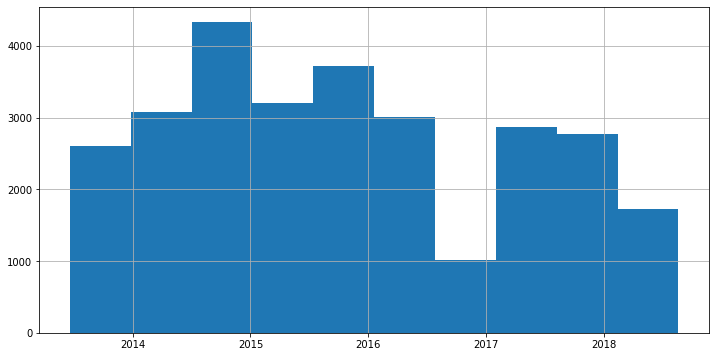

In [141]:
tweet_df['tweet_time'].hist(figsize=(12,6))

## 7) Did the account get many likes or retweets?

Use ``value_counts()`` and ``describe()`` on the ``like_count`` and ``retweet_count`` columns to gauge how successful you think this account was at propagating information.

In [160]:
tweet_df['like_count'].value_counts()

0.0      26430
1.0       1527
2.0        213
3.0         73
4.0         36
6.0         11
5.0          8
7.0          6
8.0          3
11.0         2
9.0          2
15.0         2
62.0         1
16.0         1
30.0         1
150.0        1
24.0         1
Name: like_count, dtype: int64

In [158]:
tweet_df['retweet_count'].mean()

0.21714104103397133

## 8) What was this account tweeting about?

We can start to explore the contents of each tweet using some basic word count methods. This is much less advanced than the more involved natural language processing methods we'll be using later on in the course, but is a good start. 

Let's begin by using the ``str.lower()`` method to convert the ``tweet_text`` column to lowercase so we don't have to worry about case sensitivity, and also using ``str.replace()`` together with a **regular expression** to catch **all puncuation marks** and replace them with an empty string; this is the same thing as stripping out all punctuation.

In [164]:
tweet_df['tweet_text'] = tweet_df['tweet_text'].str.lower().str.replace('[^\w\s]','')

We can confirm the replacement has worked!

In [165]:
tweet_df['tweet_text']

664        cfb431d28838bc87b3473081cc5899cfede8252c201564...
665        cfb431d28838bc87b3473081cc5899cfede8252c201564...
666        cfb431d28838bc87b3473081cc5899cfede8252c201564...
667        nydailynews nypdnews white house abuses fergus...
668        cfb431d28838bc87b3473081cc5899cfede8252c201564...
669        obama riffs on healthcare policy httptco61xj60...
670        a review of the martin_luther_kings life amp l...
671        iphone stun gun found in police search httptco...
672        ustaliban prisoner swap a serious breach of af...
891        ayatollah khamenei tells russias president tha...
892        rinse and repeat 82 new ustrained syrians prep...
893        colleges cut ties with billcosby amidst sexual...
894             washingtons secret agendas httptcop6jlfazaq6
895        maxblumenthal madeinnablus why is obama so obs...
896        turkish president is seeking to reestablish th...
897        qatari support for gaza a lesson to follow or ...
898        deep disputes

Now use filtering and ``.str.contains()`` to find out what **percentage** of the tweets mention the following terms (remember we've converted everything to lowercase so your search terms need to be lowercase as well):

* obama
* brexit
* trump
* syria
* iran
* uk 
* russia

In [175]:
tweet_df[tweet_df['tweet_text'].str.contains('obama')].shape[0]*100/tweet_df.shape[0]

2.0692090395480225

In [176]:
tweet_df[tweet_df['tweet_text'].str.contains('brexit')].shape[0]*100/tweet_df.shape[0]

0.14124293785310735

In [177]:
tweet_df[tweet_df['tweet_text'].str.contains('trump')].shape[0]*100/tweet_df.shape[0]

4.491525423728813

In [179]:
tweet_df[tweet_df['tweet_text'].str.contains('syria')].shape[0]*100/tweet_df.shape[0]

5.82274011299435

In [180]:
tweet_df[tweet_df['tweet_text'].str.contains('iran')].shape[0]*100/tweet_df.shape[0]

4.883474576271187

In [182]:
tweet_df[tweet_df['tweet_text'].str.contains('uk')].shape[0]*100/tweet_df.shape[0]

3.4216101694915255

In [183]:
tweet_df[tweet_df['tweet_text'].str.contains('russia')].shape[0]*100/tweet_df.shape[0]

2.8177966101694913

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)